## Connect to the GIS

In [7]:
from arcgis.gis import *
from arcgis import geoanalytics
gis = GIS("https://dev003735.esri.com/portal", "admin", "esri.agp")

## Get the data store manger for gax server and list the data stores

In [6]:
dm_list = geoanalytics.get_datastores()
dm_list

<DatastoreManager for https://dev003736.esri.com:6443/arcgis/admin>

In [9]:
gax_dm = dm_list
gax_dm.search()

[]

## Search my contents for big data file share items

In [10]:
BDFS_search_result = gis.content.search("", item_type = "big data file share")
BDFS_search_result

[]

## Add a big data file share

In [11]:
gax_dm.add_bigdata("hurricanes_all", '\\teton\Atma_shared\datasets\big_data\hurricanes\full_dataset')

Created Big Data file share for hurricanes_all


<Datastore title:"/bigDataFileShares/hurricanes_all" type:"bigDataFileShare">

In [14]:
ds1 = gax_dm.search()[0]

In [18]:
ds1.info

{'connectionString': '{crypt}LhHgS062epk3nd8dDcq0j6OZVIC1rG+4JAFaJSDFi3ojB7P2ig5V3STpIQmIQQhUzGNui942Ua8LLDNrEatujimxTbQkMAx6',
 'connectionType': 'fileShare'}

In [6]:
split_data_item = BDFS_search_result[0]
split_data_item.url

'https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer'

In [7]:
split_data_item.layers

[<Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1842_h1852">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1852_h1862">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1862_h1872">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1872_h1882">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1882_h1892">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1892_h1902">,
 <Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_ht_ui5/BigDataCatalogServer/h1902_h1912">,
 <Layer url:"https:/

In [8]:
fullds_data_item = BDFS_search_result[5]
fullds_data_item.layers

[<Layer url:"https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_full_dataset3/BigDataCatalogServer/full_dataset">]

# Aggregate using Reconstruct tracks big data task

In [9]:
input_layer = fullds_data_item.layers[0]

### Inspect the manifest

In [10]:
ds_obj = gax_dm.search()[2]

In [11]:
ds_obj.manifest

{'datasets': [{'format': {'extension': 'shp', 'type': 'shapefile'},
   'geometry': {'geometryType': 'esriGeometryPoint',
    'spatialReference': {'wkid': 4326}},
   'name': 'full_dataset',
   'schema': {'fields': [{'name': 'serial_num', 'type': 'esriFieldTypeString'},
     {'name': 'season', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'num', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'basin', 'type': 'esriFieldTypeString'},
     {'name': 'sub_basin', 'type': 'esriFieldTypeString'},
     {'name': 'name', 'type': 'esriFieldTypeString'},
     {'name': 'iso_time', 'type': 'esriFieldTypeString'},
     {'name': 'nature', 'type': 'esriFieldTypeString'},
     {'name': 'latitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'longitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'wind_wmo_', 'type': 'esriFieldTypeDouble'},
     {'name': 'pres_wmo_', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'center', 'type': 'esriFieldTypeString'},
     {'name': 'wind_wmo1', 'type': 'e

## Execute big data tool

In [13]:
agg_result = gis.tools.bigdata.reconstruct_tracks(input_layer,
                                                 track_fields = 'Serial_Num',
                                                 output_name = 'hurricane_tracks_agg_result_fullds5',
                                                 method = 'GEODESIC')

Submitted.
Executing...
Executing (ReconstructTracks): ReconstructTracks "Feature Set" Serial_Num Geodesic # # # # {"serviceProperties":{"serviceUrl":"http://Dev002759.esri.com/server/rest/services/Hosted/hurricane_tracks_agg_result_fullds5/FeatureServer","name":"hurricane_tracks_agg_result_fullds5"},"itemProperties":{"itemId":"09599c5fd6904109b543b38d3224f6ed"}} {}
Start Time: Mon Oct 17 11:36:17 2016
Using URL based GPRecordSet param: https://dev002857.esri.com/arcgis/rest/services/DataStoreCatalogs/bigDataFileShares_full_dataset3/BigDataCatalogServer/full_dataset
{"messageCode":"BD_101028","message":"Starting new distributed job with 8 tasks.","params":{"totalTasks":"8"}}
{"messageCode":"BD_101029","message":"1/8 distributed tasks completed.","params":{"completedTasks":"1","totalTasks":"8"}}
{"messageCode":"BD_101029","message":"5/8 distributed tasks completed.","params":{"completedTasks":"5","totalTasks":"8"}}
{"messageCode":"BD_101029","message":"7/8 distributed tasks completed.",

# Analyze results

In [14]:
agg_result = gis.content.search("hurricane_tracks_agg_result_fullds")[0]
agg_result

<Item title:"hurricane_tracks_agg_result_fullds" type:Feature Service owner:admin>

In [15]:
map1 = gis.map()
map1

In [16]:
map1.add_layer(agg_result)

In [17]:
map1.start_time = '1842'
map1.end_time = '1852'

## Analyze the attribute info

In [18]:
from arcgis.lyr import FeatureService
from pandas.io.json import json_normalize

agg_result_FS = FeatureService(agg_result.url, gis)
agg_result_FL = agg_result_FS.layers
agg_result_FL

[<FeatureLayer url:"http://Dev002759.esri.com/server/rest/services/Hosted/hurricane_tracks_agg_result_fullds/FeatureServer/0">]

In [19]:
query_result = agg_result_FL[0].query(out_fields = "*", returnGeometry = False)

att_data_frame = json_normalize(query_result)
att_data_frame.columns = att_data_frame.columns.str.replace("attributes.","")
att_data_frame.head()

,ANY_basin,ANY_center,ANY_iso_time,ANY_name,ANY_nature,ANY_size,ANY_sub_basin,ANY_track_type,COUNT,COUNT_Wind,...,VAR_latitude,VAR_longitude,VAR_num,VAR_pres_wmo1,VAR_pres_wmo_,VAR_season,VAR_wind_wmo1,VAR_wind_wmo_,globalid,serial_num
0,SI,reunion,1848-01-11 06:00:00,XXXX848002,NR,0,MM,main,6.0,6.0,...,69.869667,17.237667,0.0,0.000000,0.000000,0.0,0.000000,0.000000,None,1848011S15057
1,NA,atcf,1852-08-19 00:00:00,NOT NAMED,TS,60000,MM,main,45.0,45.0,...,31.379980,51.831545,0.0,822.206487,20522.688889,0.0,330.821730,490.909091,None,1852232N21293
2,NA,atcf,1852-09-22 00:00:00,NOT NAMED,TS,50000,MM,main,36.0,36.0,...,28.048159,25.096286,0.0,0.000000,0.000000,0.0,74.865499,100.634921,None,1852266N16302
3,SI,reunion,1854-02-01 06:00:00,XXXX854010,NR,0,MM,main,4.0,4.0,...,4.542500,2.615833,0.0,0.000000,0.000000,0.0,0.000000,0.000000,None,1854032S17059
4,SI,reunion,1854-03-01 06:00:00,XXXX854011,NR,0,MM,main,4.0,4.0,...,4.430000,0.042500,0.0,0.000000,0.000000,0.0,0.000000,0.000000,None,1854060S15069


In [20]:
att_data_frame.shape

(568, 95)

In [21]:
att_data_frame.columns

Index(['ANY_basin', 'ANY_center', 'ANY_iso_time', 'ANY_name', 'ANY_nature',
       'ANY_size', 'ANY_sub_basin', 'ANY_track_type', 'COUNT', 'COUNT_Wind',
       'COUNT_basin', 'COUNT_center', 'COUNT_iso_time', 'COUNT_latitude',
       'COUNT_longitude', 'COUNT_name', 'COUNT_nature', 'COUNT_num',
       'COUNT_pres_wmo1', 'COUNT_pres_wmo_', 'COUNT_season', 'COUNT_size',
       'COUNT_sub_basin', 'COUNT_track_type', 'COUNT_wind_wmo1',
       'COUNT_wind_wmo_', 'END_DATETIME', 'MAX_Wind', 'MAX_latitude',
       'MAX_longitude', 'MAX_num', 'MAX_pres_wmo1', 'MAX_pres_wmo_',
       'MAX_season', 'MAX_wind_wmo1', 'MAX_wind_wmo_', 'MEAN_Wind',
       'MEAN_latitude', 'MEAN_longitude', 'MEAN_num', 'MEAN_pres_wmo1',
       'MEAN_pres_wmo_', 'MEAN_season', 'MEAN_wind_wmo1', 'MEAN_wind_wmo_',
       'MIN_Wind', 'MIN_latitude', 'MIN_longitude', 'MIN_num', 'MIN_pres_wmo1',
       'MIN_pres_wmo_', 'MIN_season', 'MIN_wind_wmo1', 'MIN_wind_wmo_',
       'OBJECTID', 'RANGE_Wind', 'RANGE_latitude', 'RANGE

## Has the number of hurricanes increased over time?

In [22]:
sorted_df = att_data_frame.sort_values('MEAN_season')

In [23]:
hurricane_freq = sorted_df.groupby('MEAN_season').count()

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x = np.asarray(hurricane_freq.axes[0])
y = np.asarray(hurricane_freq['COUNT'])

<Container object of 51 artists>

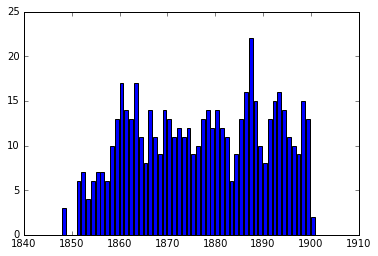

In [26]:
fig, ax = plt.subplots()
ax.bar(x, y)

### Fit a trend line

In [27]:
fit1 = np.polyfit(x, y, deg=1)
fit1

array([  8.51067944e-02,  -1.48434647e+02])

In [28]:
ax.plot(x, x*fit1[0] + fit1[1], color='red', linewidth=4)

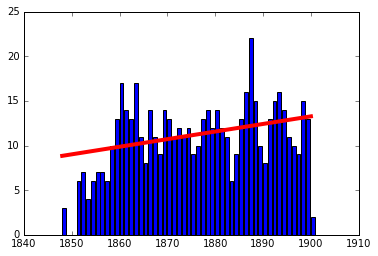

In [29]:
fig

# Has the duration of hurricanes increased over time?

In [30]:
intensity_df = sorted_df[['MEAN_season', 'MAX_wind_wmo_','VAR_pres_wmo1', 'TRACK_DURATION']]
intensity_df.head(10)

,MEAN_season,MAX_wind_wmo_,VAR_pres_wmo1,TRACK_DURATION
0,1848.0,0.0,0.0,432000000
166,1848.0,0.0,0.0,518400000
350,1848.0,0.0,0.0,864000000
467,1851.0,0.0,0.0,604800000
352,1851.0,100.0,0.0,1015200000
468,1851.0,50.0,0.0,324000000
351,1851.0,0.0,0.0,172800000
167,1851.0,80.0,0.0,259200000
469,1851.0,60.0,0.0,324000000
2,1852.0,80.0,0.0,756000000


In [31]:
np_season = np.asarray(intensity_df['MEAN_season'])
np_wind = np.asarray(intensity_df['MAX_wind_wmo_'])
np_pressure = np.asarray(intensity_df['VAR_pres_wmo1'])
np_duration = np.asarray(intensity_df['TRACK_DURATION'] / (1000*60*60*24))

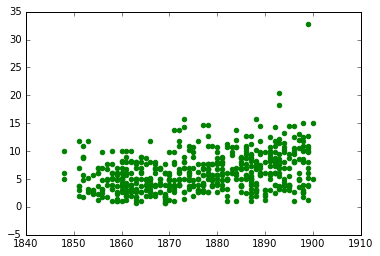

In [32]:
fig2, ax2 = plt.subplots()
ax2.scatter(np_season, np_duration, color='green')

In [33]:
fit2_1 = np.polyfit(np_season, np_duration, deg=1)
ax2.plot(np_season, np_season * fit2_1[0] + fit2_1[1], linewidth=4, color='red')
fit2_1

array([  7.77924491e-02,  -1.39884370e+02])

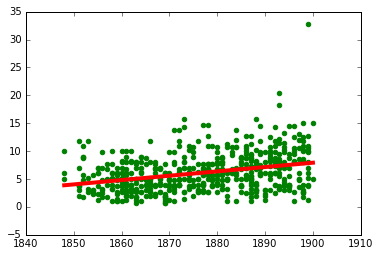

In [34]:
fig2